In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# Kaggle Preparation

In [2]:
import re
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [3]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leonardrizta","key":"9e49c9b604d0e7ce6ee28ad39bffc2b1"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-01 11:18:46           6739  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           3996  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1349  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           2101  
mathurinache/twitter-edge-nodes                             Twitter Edge Nod

# Dataset Download

In [5]:
!kaggle datasets download -d shubhamgoel27/dermnet

100% 1.72G/1.72G [00:19<00:00, 84.7MB/s]
100% 1.72G/1.72G [00:19<00:00, 95.5MB/s]


In [6]:
dataset_path = "/content/dermnet.zip"
zip_ref = zipfile.ZipFile(dataset_path, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [7]:
train_data_dir = '/tmp/train/'
validation_data_dir = '/tmp/test/'

# Dataset Preparation

In [8]:
train_data_list = os.listdir(train_data_dir)
validation_data_list = os.listdir(validation_data_dir)
print(os.listdir(train_data_dir))
print(os.listdir(validation_data_dir))
print(len(os.listdir(train_data_dir)))
print(len(os.listdir(validation_data_dir)))

['Melanoma Skin Cancer Nevi and Moles', 'Warts Molluscum and other Viral Infections', 'Scabies Lyme Disease and other Infestations and Bites', 'Exanthems and Drug Eruptions', 'Nail Fungus and other Nail Disease', 'Lupus and other Connective Tissue diseases', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Systemic Disease', 'Light Diseases and Disorders of Pigmentation', 'Herpes HPV and other STDs Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Bullous Disease Photos', 'Vasculitis Photos', 'Acne and Rosacea Photos', 'Urticaria Hives', 'Psoriasis pictures Lichen Planus and related diseases', 'Atopic Dermatitis Photos', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Poison Ivy Photos and other Contact Dermatitis', 'Eczema Photos', 'Vascular Tumors', 'Seborrheic Keratoses and other Benign Tumors']
['Melanoma Skin Cancer Nevi and Moles', 'Warts Molluscum and other Viral Infections', 'Sca

In [9]:
used_data = ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Eczema Photos', 'Light Diseases and Disorders of Pigmentation', 'Nail Fungus and other Nail Disease']

In [10]:
unused_data = train_data_list
print(unused_data)

['Melanoma Skin Cancer Nevi and Moles', 'Warts Molluscum and other Viral Infections', 'Scabies Lyme Disease and other Infestations and Bites', 'Exanthems and Drug Eruptions', 'Nail Fungus and other Nail Disease', 'Lupus and other Connective Tissue diseases', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Systemic Disease', 'Light Diseases and Disorders of Pigmentation', 'Herpes HPV and other STDs Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Bullous Disease Photos', 'Vasculitis Photos', 'Acne and Rosacea Photos', 'Urticaria Hives', 'Psoriasis pictures Lichen Planus and related diseases', 'Atopic Dermatitis Photos', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Poison Ivy Photos and other Contact Dermatitis', 'Eczema Photos', 'Vascular Tumors', 'Seborrheic Keratoses and other Benign Tumors']


In [11]:
for data in used_data:
  unused_data.remove(data)
print(unused_data)
print(len(unused_data))

['Melanoma Skin Cancer Nevi and Moles', 'Warts Molluscum and other Viral Infections', 'Scabies Lyme Disease and other Infestations and Bites', 'Exanthems and Drug Eruptions', 'Lupus and other Connective Tissue diseases', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Systemic Disease', 'Herpes HPV and other STDs Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Bullous Disease Photos', 'Vasculitis Photos', 'Urticaria Hives', 'Psoriasis pictures Lichen Planus and related diseases', 'Atopic Dermatitis Photos', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Poison Ivy Photos and other Contact Dermatitis', 'Vascular Tumors', 'Seborrheic Keratoses and other Benign Tumors']
18


In [12]:
for data in unused_data:
  try:
    shutil.rmtree(train_data_dir+ data)
  except OSError as e:
    print("Folder already deleted")
  try:
    shutil.rmtree(validation_data_dir+ data)
  except OSError as e:
    print("Folder already deleted")
print("Done!")

Done!


In [13]:
for directory in sorted(os.listdir(train_data_dir)):
  print(directory)

Acne and Rosacea Photos
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
Eczema Photos
Light Diseases and Disorders of Pigmentation
Nail Fungus and other Nail Disease


## Download list file

In [14]:
disease_directory = "Acne and Rosacea Photos/" #Change directory name with spesific disease
with open('file.txt', 'a') as f:
  for data in sorted(os.listdir(train_data_dir+disease_directory)):
    print(data, file=f)

## Acne

In [15]:
disease_directory = "Acne and Rosacea Photos/"

In [16]:
pattern_list = ["^07[\w-]*.jpg", 
                "^acne-[\w-]*.jpg", 
                "^gram-[\w-]*.jpg",
                "^perioral-dermatitis[\w-]*.jpg",
                "^rosacea-[\w-]*.jpg",
                ]

In [17]:
for data in sorted(os.listdir(train_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is not None:
      break
  if x is None:
    os.remove(train_data_dir+disease_directory+data)
print("train data: "+str(len(os.listdir(train_data_dir+disease_directory))))

train data: 682


In [18]:
pattern_list = ["Forest-2",
                ]

In [19]:
print("validation data: "+str(len(os.listdir(validation_data_dir+disease_directory))))

validation data: 312


In [20]:
for data in sorted(os.listdir(validation_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is None:
      break
  if x is not None:
    os.remove(validation_data_dir+disease_directory+data)
print("validation data: "+str(len(os.listdir(validation_data_dir+disease_directory))))

validation data: 311


## Actinic

In [21]:
disease_directory = "Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions/"

In [22]:
pattern_list = ["^actinic-[\w-]*.jpg",
                "^basal-[\w-]*.jpg",
                "^squamous-[\w-]*.jpg",
                ]

In [23]:
for data in sorted(os.listdir(train_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is not None:
      break
  if x is None:
    os.remove(train_data_dir+disease_directory+data)
print("train data: "+str(len(os.listdir(train_data_dir+disease_directory))))

train data: 822


In [24]:
pattern_list = ["^Forest-2[\w-]*.jpg", 
                ]

In [25]:
print("validation data: "+str(len(os.listdir(validation_data_dir+disease_directory))))

validation data: 288


In [26]:
for data in sorted(os.listdir(validation_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is None:
      break
  if x is not None:
    os.remove(validation_data_dir+disease_directory+data)
print("validation data: "+str(len(os.listdir(validation_data_dir+disease_directory))))

validation data: 288


## Eczema Photos

In [27]:
disease_directory = "Eczema Photos/"

In [28]:
pattern_list = ["03Desquamation-[\w-]*.jpg",
                "03Eczema[\w-]*.jpg",
                "Dyshidrosis-[\w-]*.jpg",
                "chapped-[\w-]*.jpg",
                "eczema-[\w-]*.jpg",
                ]

In [29]:
for data in sorted(os.listdir(train_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is not None:
      break
  if x is None:
    os.remove(train_data_dir+disease_directory+data)
print("train data: "+str(len(os.listdir(train_data_dir+disease_directory))))

train data: 793


In [30]:
pattern_list = ["^eczema-histology[\w-]*.jpg",
                "^eczema-impetiginized[\w-]*.jpg",
                "^eczema-lids[\w-]*.jpg",
                "^eczema-penis[\w-]*.jpg",
                "^eczema-scrotum[\w-]*.jpg",
                "^eczema-subacute[\w-]*.jpg",
                "^Forest-2[\w-]*.jpg",
                ]

In [31]:
for data in sorted(os.listdir(validation_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is None:
      break
  if x is not None:
    os.remove(validation_data_dir+disease_directory+data)
print("validation data: "+str(len(os.listdir(validation_data_dir+disease_directory))))

validation data: 309


## Light Diseases

In [32]:
disease_directory = "Light Diseases and Disorders of Pigmentation/"

In [33]:
pattern_list = ["^albinism-[\w-]*.jpg",
                "^colloid-[\w-]*.jpg",
                "^erythema-[\w-]*.jpg",
                "^erythromelanosis-[\w-]*.jpg",
                "^idiopathic-[\w-]*.jpg",
                "^lentigo-[\w-]*.jpg",
                "^melasma-[\w-]*.jpg",
                "^mongolian-[\w-]*.jpg",
                "^nevus-[\w-]*.jpg",
                "^phototoxic-[\w-]*.jpg",
                "^poikiloderma-[\w-]*.jpg",
                "^polymorphous-[\w-]*.jpg",
                "^radiation-[\w-]*.jpg",
                "^sun-[\w-]*.jpg",
                "^sunburn-[\w-]*.jpg",
                ]

In [34]:
for data in sorted(os.listdir(train_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is not None:
      break
  if x is None:
    os.remove(train_data_dir+disease_directory+data)
print("train data: "+str(len(os.listdir(train_data_dir+disease_directory))))

train data: 408


In [35]:
pattern_list = ["Forest-2[\w-]*.jpg",
                ]

In [36]:
for data in sorted(os.listdir(validation_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is None:
      break
  if x is not None:
    os.remove(validation_data_dir+disease_directory+data)
print("validation data: "+str(len(os.listdir(validation_data_dir+disease_directory))))

validation data: 143


## Nail Fungus

In [37]:
disease_directory = "Nail Fungus and other Nail Disease/"

In [38]:
pattern_list = ["acute[\w-]*.jpg",
                "beaus[\w-]*.jpg",
                "biting[\w-]*.jpg",
                "blue[\w-]*.jpg",
                "chronic[\w-]*.jpg",
                "clubbing[\w-]*.jpg",
                "color[\w-]*.jpg",
                "congenital[\w-]*.jpg",
                "darier[\w-]*.jpg",
                "distal[\w-]*.jpg",
                "dry[\w-]*.jpg",
                "eczema[\w-]*.jpg",
                "habit[\w-]*.jpg",
                "ingrown[\w-]*.jpg",
                "koilonychia[\w-]*.jpg",
                ]
                

In [39]:
for data in sorted(os.listdir(train_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is not None:
      break
  if x is None:
    os.remove(train_data_dir+disease_directory+data)
print("train data: "+str(len(os.listdir(train_data_dir+disease_directory))))

train data: 349


In [40]:
pattern_list = ["^Forest-2[\w-]*.jpg",
                ]

In [41]:
for data in sorted(os.listdir(validation_data_dir+disease_directory)):
  x = None
  for pattern in pattern_list:
    x = re.search(pattern, data)
    if x is None:
      break
  if x is not None:
    os.remove(validation_data_dir+disease_directory+data)
print("validation data: "+str(len(os.listdir(validation_data_dir+disease_directory))))

validation data: 261


# Image Generator

In [42]:
img_width, img_height = 224, 224

In [43]:
def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a = preprocess_input(a)
    return a

In [44]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input

HEIGHT = 224
WIDTH = 224
BATCH_SIZE = 16

train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode = 'nearest'
    )

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE)


test_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode = 'nearest'
    )
validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE)

Found 3054 images belonging to 5 classes.
Found 1312 images belonging to 5 classes.


# Model Build

## Resnet50 #6

In [45]:
input_t = tf.keras.Input(shape=(224,224,3))
resnet_model = tf.keras.applications.resnet50.ResNet50(include_top=False,
                                    weights="imagenet",
                                    input_tensor=input_t)

94773248/94765736 [==============================] - 1s 0us/step


In [46]:
def build_model(base_model, num_classes):
  for layer in base_model.layers:
    layer.trainable = False

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (224,224))))
  model.add(base_model)
  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(1024,activation=('relu')))
  model.add(tf.keras.layers.Dense(512,activation=('relu')))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(256,activation=('relu'))) 
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.Dense(128,activation=('relu')))
  model.add(tf.keras.layers.Dropout(0.2))

  model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

  return model

class_list = os.listdir(train_data_dir)
model = build_model(resnet_model, num_classes = len(class_list))

In [47]:
check_point = tf.keras.callbacks.ModelCheckpoint("dermnet.h5", 
                                                 monitor='val_accuracy', 
                                                 verbose=1, 
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [48]:
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [49]:
NUM_EPOCHS = 45
history = model.fit(train_generator, 
                    epochs=NUM_EPOCHS, 
                    workers=16,
                    verbose=1,
                    validation_data = validation_generator,
                    callbacks=[check_point]
                    )

Epoch 1/45
191/191 [==============================] - 70s 337ms/step - loss: 2.2180 - accuracy: 0.4276 - val_loss: 1.1547 - val_accuracy: 0.5488

Epoch 00001: val_accuracy improved from -inf to 0.54878, saving model to dermnet.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/45
191/191 [==============================] - 66s 334ms/step - loss: 1.3145 - accuracy: 0.5485 - val_loss: 1.0262 - val_accuracy: 0.6265

Epoch 00002: val_accuracy improved from 0.54878 to 0.62652, saving model to dermnet.h5
Epoch 3/45
191/191 [==============================] - 64s 325ms/step - loss: 1.1397 - accuracy: 0.6002 - val_loss: 0.9782 - val_accuracy: 0.6357

Epoch 00003: val_accuracy improved from 0.62652 to 0.63567, saving model to dermnet.h5
Epoch 4/45
191/191 [==============================] - 66s 332ms/step - loss: 0.9959 - accuracy: 0.6477 - val_loss: 0.9838 - val_accuracy: 0.6410

Epoch 00004: val_accuracy improved from 0.63567 to 0.64101, saving model to dermnet.h5
Epoch 5/45
191/191 [==============================] - 66s 331ms/step - loss: 0.8833 - accuracy: 0.6814 - val_loss: 0.9731 - val_accuracy: 0.6486

Epoch 00005: val_accuracy improved from 0.64101 to 0.64863, saving model to dermnet.h5
Epoch 6/45
191/191 [==============================] - 65s 331ms/step

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 224, 224, None)    0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              102761472 
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1

# Show Accuracy

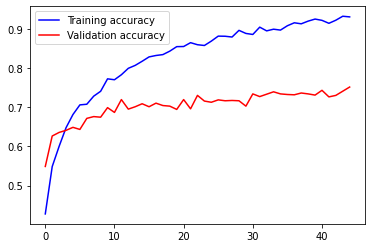

<Figure size 432x288 with 0 Axes>

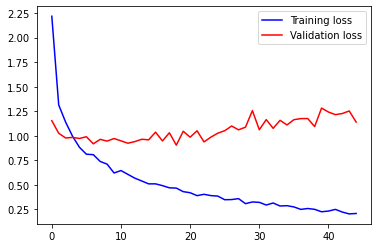

<Figure size 432x288 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# Confusion Matrix

In [52]:
print(validation_generator.classes)

[0 0 0 ... 4 4 4]


In [53]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

num_test_images = 1457 
# Y_pred = finetune_model.predict_generator(validation_generator, num_test_images // BATCH_SIZE+1)
Y_pred = model.predict_generator(validation_generator, num_test_images)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('\nClassification Report')
# 7 target_names = ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Eczema Photos', 'Light Diseases and Disorders of Pigmentation', 'Nail Fungus and other Nail Disease', 'Vascular Tumors', 'Warts Molluscum and other Viral Infections']
# 5 target_names = ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Light Diseases and Disorders of Pigmentation', 'Vascular Tumors', 'Warts Molluscum and other Viral Infections']
target_names = ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Eczema Photos', 'Light Diseases and Disorders of Pigmentation', 'Nail Fungus and other Nail Disease', 'Vascular Tumors', 'Warts Molluscum and other Viral Infections']

print(classification_report(validation_generator.classes, y_pred, target_names=used_data))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[63 74 82 34 58]
 [63 68 91 22 44]
 [65 76 86 39 43]
 [44 34 35 14 16]
 [62 70 70 21 38]]

Classification Report
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.21      0.20      0.21       311
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.21      0.24      0.22       288
                                                     Eczema Photos       0.24      0.28      0.26       309
                      Light Diseases and Disorders of Pigmentation       0.11      0.10      0.10       143
                                Nail Fungus and other Nail Disease       0.19      0.15      0.17       261

                                                          accuracy                           0.21      1312
                                                         macro avg       0.19      0.19      0.19      1312
   

# Test Predict

In [57]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  classes_predict = model.predict_classes(images)
  print(classes)
  print(classes_predict)
  print(used_data[np.argmax(classes)])

Saving t-eczema-foot-43.jpg to t-eczema-foot-43 (3).jpg
[[1.2619196e-07 1.8601007e-05 9.9996102e-01 1.8107496e-05 2.1384030e-06]]
[2]
Eczema Photos


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Save Model

In [59]:
model.save("dermnet.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# Upload to GCS

In [60]:
!ls -al

total 4414460
drwxr-xr-x 1 root root       4096 Jun  5 12:27  .
drwxr-xr-x 1 root root       4096 Jun  5 11:24  ..
drwxr-xr-x 4 root root       4096 Jun  1 13:40  .config
-rw-r--r-- 1 root root 1336132696 Jun  5 12:27  dermnet.h5
-rw-r--r-- 1 root root 1847748564 Jun  5 11:26  dermnet.zip
-rw-r--r-- 1 root root      18956 Jun  5 11:27  file.txt
drwxr-xr-x 2 root root       4096 Jun  5 12:27  .ipynb_checkpoints
-rw-r--r-- 1 root root         68 Jun  5 11:25  kaggle.json
drwxr-xr-x 1 root root       4096 Jun  1 13:40  sample_data
-rw-r--r-- 1 root root      81003 Jun  5 12:23 't-eczema-foot-43 (1).jpg'
-rw-r--r-- 1 root root      81003 Jun  5 12:25 't-eczema-foot-43 (2).jpg'
-rw-r--r-- 1 root root      81003 Jun  5 12:26 't-eczema-foot-43 (3).jpg'
-rw-r--r-- 1 root root      81003 Jun  5 12:22  t-eczema-foot-43.jpg
-rw-r--r-- 1 root root 1336132696 Jun  5 12:20  train_dermnet.h5


In [61]:
from google.colab import auth
auth.authenticate_user()

In [62]:
project_id ='plexiform-being-312905'
bucket_name = 'dermnet'

In [63]:
from datetime import datetime

now = datetime.now()
current_time = now.strftime("%d%m%y-%H%M%S")
current_time

'050621-122837'

In [64]:
!gsutil cp dermnet.h5 gs://{bucket_name}/{current_time}/

Copying file://dermnet.h5 [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

/
Operation completed over 1 objects/1.2 GiB.                                      
